In [93]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 5.1.1

In [94]:
# define fit A mat
def designmatpoly(X, wtvector):
    X = X[:,0]
    A_traint = np.ones(X.shape)
    #print (len(wtvector), np.shape(A_traint))    
    
    for i in range(len(wtvector)-1):
        X_row = X**(i + 1)
        A_traint = np.vstack((A_traint, X_row))         
    A_train = A_traint.T
    #print (np.shape(A_train))
    return A_train

# regularisation gradient descent function
def reg_gradientdescent(w, X, y, l2, rate, n_iterations):
    wtseq = [w]
    for iteration in range(n_iterations):
        #print('iteration is:', iteration)
        gradients =  2/len(X) * X.T.dot(X.dot(w) - y) + 2 * l2 * w
        #print ('gradients',gradients)
        w = w - rate * gradients
    print ('final gradient',gradients)
    return w

# squared residuals
def squared_residual(x_test, y_test, wt):
    residual = 0
    x_test = x_test[:,0]
    
    for i in range(len(x_test)):
        y_predi = 0
        x_testi = x_test[i]
        for wti in range(len(wt)):
            y_predi += wt[wti]*np.power(x_testi, wti)
        residual += (y_test[i] - y_predi)**2   
    #print('residual is:************ ', residual)
    return residual

# predicted value
def predict(x, wt):    
    y_pred = []
    
    for i in range(len(x)):
        y_predi = 0
        x_i = x[i]
        for wti in range(len(wt)):
            y_predi += wt[wti]*np.power(x_i, wti)
#             print(wt[wti]*np.power(x_i, wti))
#             print('---------------------------------')
#         print('*************')
        y_pred.append(y_predi)
#   print('y_pred shape',np.shape(y_pred))
    return y_pred

In [151]:
# data preperation
from sklearn.model_selection import train_test_split

def f(x):
    return np.sin(x)

points = 180
X = np.linspace(0, 2*np.pi,points)
y = f(X)+np.random.normal(0,0.05,points)  # np.sqrt(np.abs(X))*
X = np.atleast_2d(X).T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

### 5.1.2

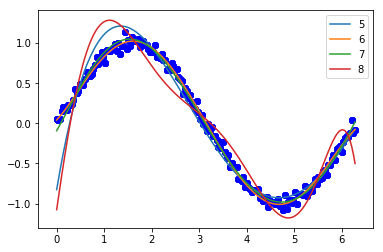

In [152]:
# analytical expression
from numpy.linalg import inv
for i in range(4):
    degree = i + 5
    w0 = np.ones(degree)
    A = designmatpoly(X, w0)
    wt_analy = inv(A.T.dot(A) - 0.5*np.eye(degree)).dot(A.T).dot(y)
    ypred = predict(X, wt_analy)
    plt.plot(X, ypred, label = degree)
    plt.legend()
    plt.scatter(X,y, c='b')

### 5.1.3 a

KeyboardInterrupt: 

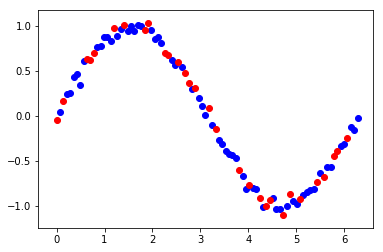

In [128]:
plt.scatter(X_train,y_train, c='b')
plt.scatter(X_test, y_test, c='r')

for i in range(3):
    degree = i + 5
    w0 = np.ones(degree)  # polynomial degree
    A_train = designmatpoly(X_train, w0)
    
    if degree == 5:
        wtfin = reg_gradientdescent(w0, A_train, y_train, .5, rate = 0.0000015, n_iterations = 2000000) # take lamda = 1 here
    elif degree == 6:
        wtfin = reg_gradientdescent(w0, A_train, y_train, 1, rate = 0.00000001, n_iterations = 40000000) # take lamda = 1 here
    elif degree == 7:
        wtfin = reg_gradientdescent(w0, A_train, y_train, 1, rate = 0.000000002, n_iterations = 200000000) # take lamda = 1 here
    else:
        pass
    print('init wt ',w0)
    print('final weight ',wtfin)
    resid = squared_residual(X_test, y_test, wtfin)
    ypred = predict(X, wtfin)
    plt.plot(X, ypred, label = degree)
    plt.legend() 
    title = 'residual: ' + str(resid) + '  degree: ' + str(degree)
    print(title)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

In [ ]:
# [ 0.11808554  0.19689184  0.31727733 -0.19938172  0.02653888 -0.00056433]
# [ 0.46099906  0.39040219  0.2214649  -0.00202124 -0.11955822  0.03388069
#  -0.00255063]


### 5.1.3 b

In [ ]:
# calculate best of lambda
l2_coef = np.linspace(0,2,9)
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
resid = np.zeros((3,9))

for i in range(3):
    degree = i + 5
    w0 = np.ones(degree)  # polynomial degree
    A_train = designmatpoly(X_train, w0)
    for l2, l2_coefi in enumerate(l2_coef):
        if degree == 5:
            wtfin5 = reg_gradientdescent(w0, A_train, y_train, l2_coefi, rate = 0.0000015, n_iterations = 2000000)
            resid[i,l2] = squared_residual(X_test, y_test, wtfin5)
        elif degree == 6:
            pass
            wtfin6 = reg_gradientdescent(w0, A_train, y_train, l2_coefi, rate = 0.00000001, n_iterations = 40000000)
            resid[i,l2] = squared_residual(X_test, y_test, wtfin6)
        elif degree == 7:
            pass
            wtfin7 = reg_gradientdescent(w0, A_train, y_train, l2_coefi, rate = 0.000000002, n_iterations = 200000000)
            resid[i,l2] = squared_residual(X_test, y_test, wtfin7)
        else:
            pass
    ax[i].plot(l2_coef, resid[i,:])
    ax[i].set_title('when degree is: ' + str(degree))


final gradient [ 0.0336225  -0.01930618 -0.00379113  0.00284663 -0.00030677]
final gradient [ 0.02308633  0.00374194 -0.01799721  0.00608455 -0.00055055]
final gradient [ 0.00862854  0.00263108 -0.00784268  0.00257357 -0.00023041]
final gradient [ 2.70116650e-03  9.87842509e-04 -2.60384403e-03  8.45546418e-04
 -7.54143088e-05]
final gradient [ 7.75832094e-04  3.09840669e-04 -7.71526331e-04  2.49202953e-04
 -2.21827252e-05]
final gradient [ 2.11739376e-04  8.90875877e-05 -2.14663280e-04  6.91119365e-05
 -6.14459645e-06]
final gradient [ 5.58643260e-05  2.43301314e-05 -5.73835160e-05  1.84347809e-05
 -1.63767316e-06]
final gradient [ 1.43881093e-05  6.42214442e-06 -1.49204894e-05  4.78581708e-06
 -4.24905907e-07]
final gradient [ 3.63951087e-06  1.65461755e-06 -3.80145448e-06  1.21790307e-06
 -1.08083449e-07]
final gradient [ 0.22503662  0.08314804  0.00244655 -0.06857151  0.02189762 -0.0018469 ]
final gradient [ 0.42188342  0.2417987   0.02867669 -0.18470391  0.0574745  -0.00481647]
fin

In [150]:
ax[i].set_title('when degree is: ' + str(degree))

Text(0.5,1,'when degree is: 5')